In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from os import listdir
from os.path import isfile, join
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [3]:
mypath = r"C:\Users\User\Documents\Python Scripts\kaggle\ml100marathon-final\data\kaggle_dogcat\train"
filenames = listdir(mypath)
#onlyfiles = [join(mypath, f,) for f in filenames if not isfile(join(mypath, f,))]
#print(listdir(r"C:\Users\User\Documents\Python Scripts\kaggle\ml100marathon-final\data\kaggle_dogcat\train"))
#print(os.listdir(r"C:\Users\User\Documents\Python Scripts\kaggle\ml100marathon-final\data\kaggle_dogcat\train\cats"))
#print(os.listdir(r"C:\Users\User\Documents\Python Scripts\kaggle\ml100marathon-final\data\kaggle_dogcat\train\dogs"))
#onlyfiles

In [4]:
categories = []
#filenames = []
#for f_dir in onlyfiles:
    #print(f_dir)
    #for filename in os.listdir(f_dir):
for filename in filenames:
    #print(filename)
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)
    #filenames.append(filename)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()

,filename,category
0,cat.10001.jpg,1
1,cat.10002.jpg,1
2,cat.10005.jpg,1
3,cat.10008.jpg,1
4,cat.10024.jpg,1


In [5]:
df["category"] = df["category"].replace({1: 'cat', 0: 'dog'}) 
#df["category"] = df["category"].replace({1: 'dog', 0: 'cat'}) 
df.head()

,filename,category
0,cat.10001.jpg,cat
1,cat.10002.jpg,cat
2,cat.10005.jpg,cat
3,cat.10008.jpg,cat
4,cat.10024.jpg,cat


In [9]:
train_df, validate_df = train_test_split(df, test_size=0.25, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=30

In [10]:
FAST_RUN = False
IMAGE_WIDTH=180
IMAGE_HEIGHT=180
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    mypath, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    shuffle=True,

    batch_size=batch_size
)

train_generator.class_indices = {'cat': 1, 'dog': 0}

Found 3000 validated image filenames belonging to 2 classes.


In [13]:
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    mypath, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    shuffle=True,

    batch_size=batch_size
)

validation_generator.class_indices = {'cat': 1, 'dog': 0}

Found 1000 validated image filenames belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [15]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#model.compile(loss='categorical_crossentropy', optimizer=, metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

W0817 21:05:28.354803  4192 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(180, 180,..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0817 21:05:28.369790  4192 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 21:05:28.372756  4192 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 128)       73856     
__________

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [17]:
epochs=5 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
100/100 [==============================] - 28s 284ms/step - loss: 0.7488 - acc: 0.5053 - val_loss: 0.6919 - val_acc: 0.5242
Epoch 2/50
100/100 [==============================] - 22s 216ms/step - loss: 0.6956 - acc: 0.5010 - val_loss: 0.6929 - val_acc: 0.5237
Epoch 3/50
100/100 [==============================] - 21s 215ms/step - loss: 0.6984 - acc: 0.4963 - val_loss: 0.6940 - val_acc: 0.4722

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/50
100/100 [==============================] - 22s 216ms/step - loss: 0.6934 - acc: 0.5063 - val_loss: 0.6939 - val_acc: 0.4794
Epoch 5/50
100/100 [==============================] - 22s 216ms/step - loss: 0.6934 - acc: 0.4993 - val_loss: 0.7041 - val_acc: 0.4763

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/50
100/100 [==============================] - 22s 218ms/step - loss: 0.6813 - acc: 0.5450 - val_loss: 0.6695 - val_acc: 0.6258
Epoch 7/50
100/100 [========

In [15]:
model.save_weights("dog_cat_model.h5")

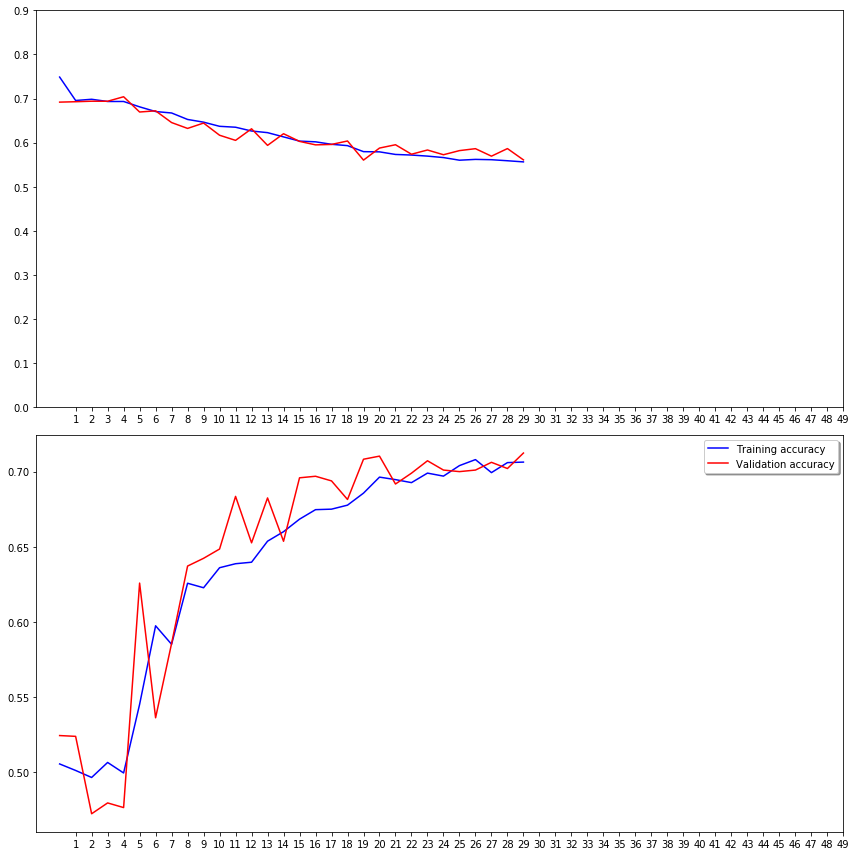

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [19]:
test_df=None
test_path = r"C:\Users\User\Documents\Python Scripts\kaggle\ml100marathon-final\data\kaggle_dogcat\test"
test_filenames = listdir(test_path)
test_df = pd.DataFrame({
    'ID': test_filenames,
    'Predicted' : 'NaN'
})
nb_samples = test_df.shape[0]
nb_samples

400

In [20]:
test_df.head()

,ID,Predicted
0,000.jpg,NaN
1,001.jpg,NaN
2,002.jpg,NaN
3,003.jpg,NaN
4,004.jpg,NaN


In [21]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_path, 
    x_col='ID',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=1,
)

Found 400 validated image filenames.


In [38]:
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [22]:
probabilities = model.predict_generator(test_generator,test_df.shape[0])

In [23]:
len(probabilities)

400

In [24]:
probabilities

array([[0.3249153 ],
       [0.3169083 ],
       [0.45006275],
       [0.45952737],
       [0.7517534 ],
       [0.8421516 ],
       [0.7245863 ],
       [0.6174664 ],
       [0.73218876],
       [0.2391955 ],
       [0.98882586],
       [0.27564055],
       [0.90828305],
       [0.47678486],
       [0.67553574],
       [0.13011596],
       [0.7397652 ],
       [0.9296866 ],
       [0.70057327],
       [0.22461374],
       [0.7717308 ],
       [0.5046232 ],
       [0.97900003],
       [0.5284131 ],
       [0.07236344],
       [0.6014022 ],
       [0.46148056],
       [0.5658291 ],
       [0.57385385],
       [0.41092297],
       [0.50959057],
       [0.867516  ],
       [0.6761698 ],
       [0.19553544],
       [0.9473269 ],
       [0.6069598 ],
       [0.9700019 ],
       [0.35697728],
       [0.8259908 ],
       [0.1888715 ],
       [0.5866543 ],
       [0.32460427],
       [0.01433913],
       [0.41645193],
       [0.47578117],
       [0.3954213 ],
       [0.20733504],
       [0.672

In [25]:
for index, probability in enumerate(probabilities):
    #print(probability)
    test_df.loc[index,["Predicted"]] = probability

In [26]:
submission_df = test_df.copy()

In [27]:
submission_df["ID"] = submission_df["ID"].str.split('.').str[0]

In [28]:
submission_df.head()

,ID,Predicted
0,000,0.324915
1,001,0.316908
2,002,0.450063
3,003,0.459527
4,004,0.751753


In [29]:
submission_df.loc[:,["ID","Predicted"]].to_csv('submission_5th.csv', index=False)

In [20]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df.head(15)

,filename,category
0,000.jpg,1
1,001.jpg,0
2,002.jpg,0
3,003.jpg,1
4,004.jpg,0
5,005.jpg,0
6,006.jpg,1
7,007.jpg,0
8,008.jpg,0
9,009.jpg,0


In [21]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
#test_df['category'] = test_df['category'].replace({'cat': 1, 'dog': 0})
test_df['category'] = test_df['category'].replace({'cat': 0, 'dog': 1})

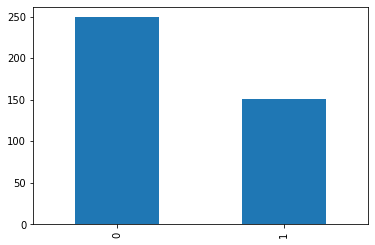

In [22]:
test_df['category'].value_counts().plot.bar()

In [23]:
import matplotlib.image as mpimg

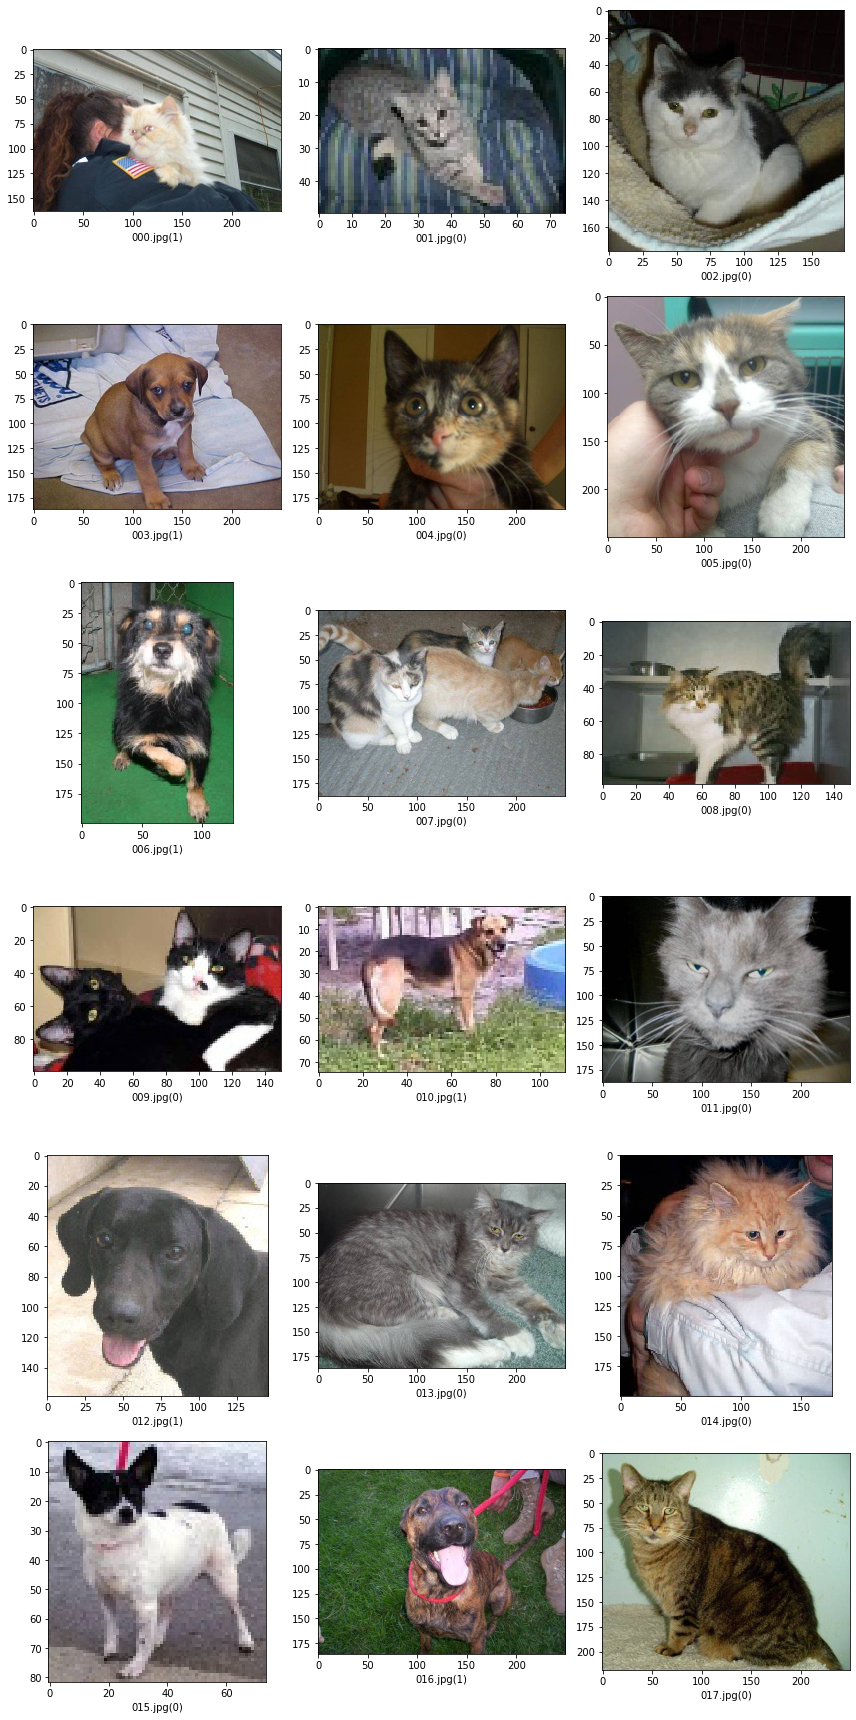

In [24]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    name = test_path + "\\" + filename
    img = mpimg.imread(name)
    
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()

In [25]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission2.csv', index=False)